In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Linear Basis Function Models

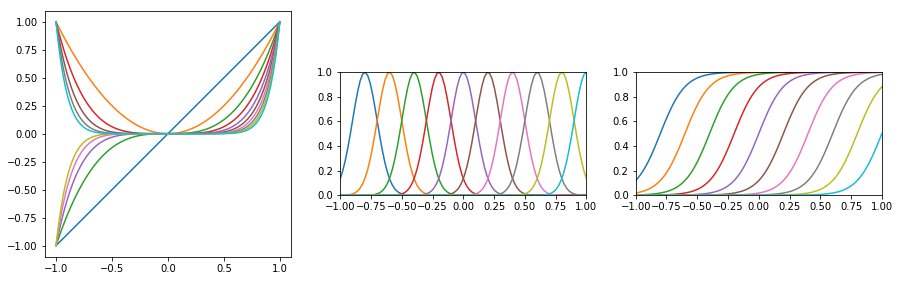

In [3]:
def polynomial(X, M):
    N = X.shape[0]
    Y = np.zeros([N, M])
    for i in range(M):
        Y[:, i] = X.reshape(-1)**i
    return Y

def gaussian(X, M):
    mean_value = np.linspace(-1,1,M)
    s = 0.1
    Y = np.zeros([X.shape[0], M])
    for i in range(M):
        Y[:, i] = np.exp(-0.5*(X.reshape(-1)-mean_value[i])**2/s**2)
    return Y

def sigmoid(X, M):
    mean_value = np.linspace(-1,1,M)
    s = 0.1
    Y = np.zeros([X.shape[0], M])
    for i in range(M):
        Y[:, i] = 1/(1+np.exp(-(X.reshape(-1)-mean_value[i])/s))
    return Y

x = np.linspace(-1,1,100).reshape(-1,1)

M = 11
Y = polynomial(x, M)
plt.figure(figsize=[15, 10])
plt.subplot(1, 3, 1)
for i in range(1, M):
    plt.plot(x, Y[:,i])
plt.gca().set_aspect('equal', adjustable='box')

Y = gaussian(x, M)
plt.subplot(1, 3, 2)
for i in range(1, M):
    plt.plot(x, Y[:, i])
plt.xlim(-1,1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

Y = sigmoid(x, M)
plt.subplot(1, 3, 3)
for i in range(1, M):
    plt.plot(x, Y[:, i])
plt.xlim(-1,1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')



# 3.2 The Bias-Variance Decomposition

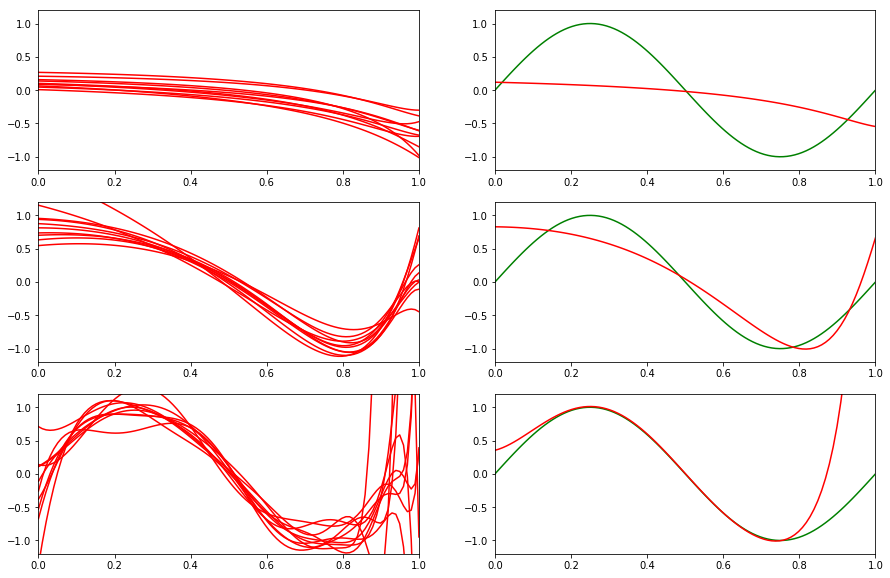

In [27]:
L = 100
N = 25
x = np.linspace(0, 1, 100).reshape(-1,1)
t = np.sin(2*np.pi*x)
M = 25
lambd = np.array([np.exp(2.6), np.exp(-3), np.exp(-20)])
plt.figure(figsize=[15, 10])
k = 1

for j in range(lambd.shape[0]):
    plt.subplot(lambd.shape[0], 2, k)
    z = np.zeros(x.shape)
    for i in range(L):
        train_x = np.random.uniform(low=0, high=1, size=N).reshape(-1, 1)
        train_y = np.sin(2*np.pi*train_x) + np.random.normal(loc=0, scale=.2, size=N).reshape(-1, 1)
        train_X = polynomial(train_x, M)
        w = np.linalg.pinv(train_X.T@train_X + lambd[j]*np.eye(M))@train_X.T@train_y
        y = polynomial(x, M)@w
        z = z + y
        if(i < 10):
            plt.plot(x, y, color='red')
            plt.xlim(0, 1)
            plt.ylim(-1.2, 1.2)
    plt.subplot(lambd.shape[0], 2, k+1)
    plt.plot(x, t, color='green')
    plt.plot(x, z/L, color='red')
    plt.xlim(0, 1)
    plt.ylim(-1.2, 1.2)
    k = k+2

# 3.3 Bayesian Linear Regression

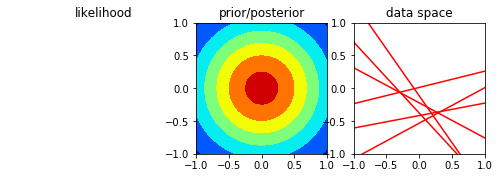

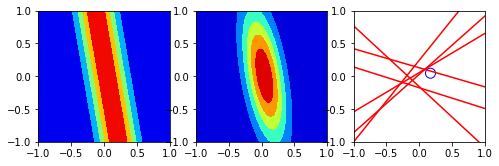

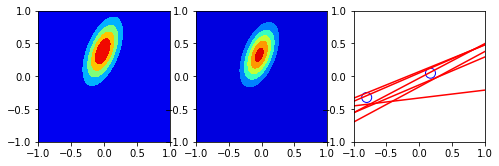

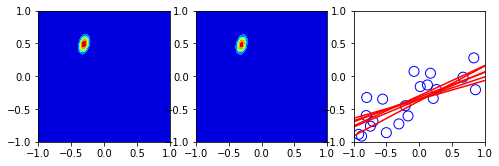

In [23]:
def gaussian(X, Y, mu, sigma):
    n = X.shape[1]
    X = np.array([X.reshape(-1), Y.reshape(-1)])
    N = X.shape[1]
    p = np.zeros([N, 1])
    for i in range(N):
        p[i] = 1/(2*np.pi*np.linalg.det(sigma)**0.5)*np.exp(-0.5*(X[:,i]-mu).reshape(-1,2)@np.linalg.inv(sigma)@(X[:,i]-mu).reshape(-1,1))
    return p.reshape(n, n)

def likelihood(x, t, W1, W2, sigma):
    n = x.shape[0]
    W = np.array([W1.reshape(-1), W2.reshape(-1)])
    N = W.shape[1]
    p = np.ones([N, 1])
    for i in range(N):
        for j in range(n):
            p[i] = p[i] * 1/(2*np.pi*sigma)**0.5*np.exp(-1/(2*sigma)*(t[j] - (W[0, i] + W[1, i]*x[j]))**2)
    return p.reshape(W1.shape[1], W1.shape[1])

a0, a1 = -0.3, 0.5
d = 2
samplesize = 20
train_x = np.random.uniform(-1,1,samplesize)
train_y = a0 + a1 * train_x + np.random.normal(0, 0.2, samplesize)
train_X = np.array([np.ones(samplesize), train_x]).T
train_Y = train_y.reshape(-1,1)
alpha = 2.0
beta = 1/0.2**2
mu_prior = np.array([0, 0])
sigma_prior = 1/alpha*np.eye(2)
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=[8, 8])
plt.subplot(1, 3, 1)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.title('likelihood')

plt.subplot(1,3,2)
plt.contourf(X, Y, gaussian(X, Y,  mu_prior, sigma_prior), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('prior/posterior')

line_num = 6
W = np.random.multivariate_normal(mu_prior, sigma_prior, line_num)
plt.subplot(1,3,3)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('data space')

inv_S = alpha*np.eye(d) + beta*(train_X[0,:].reshape(-1,2)).T@train_X[0,:].reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X[0,:].reshape(-1,2)).T@train_Y[0:1].reshape(-1,1)
plt.figure(figsize=[8,8])
plt.subplot(1, 3, 1)
plt.contourf(X, Y, likelihood(train_x[0:1], train_y[0:1], X, Y, 1/beta), 5, cmap='jet')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1,3,2)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')

W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,3,3)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x[0:1], train_y[0:1], edgecolors='blue', color='', s=100)

inv_S = alpha*np.eye(d) + beta*(train_X[0:2,:].reshape(-1,2)).T@train_X[0:2,:].reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X[0:2,:].reshape(-1,2)).T@train_Y[0:2].reshape(-1,1)
plt.figure(figsize=[8,8])
plt.subplot(1, 3, 1)
plt.contourf(X, Y, likelihood(train_x[0:2], train_y[0:2], X, Y, 1/beta), 5, cmap='jet')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1,3,2)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')


W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,3,3)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x[0:2], train_y[0:2], edgecolors='blue', color='', s=100)

inv_S = alpha*np.eye(d) + beta*(train_X.reshape(-1,2)).T@train_X.reshape(-1,2)
mu = beta*np.linalg.inv(inv_S)@(train_X.reshape(-1,2)).T@train_Y.reshape(-1,1)
plt.figure(figsize=[8,8])
plt.subplot(1, 3, 1)
plt.contourf(X, Y, likelihood(train_x, train_y, X, Y, 1/beta), 5, cmap='jet')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.subplot(1,3,2)
plt.contourf(X, Y, gaussian(X, Y,  mu.reshape(-1), np.linalg.inv(inv_S)), 5, cmap='jet')
plt.gca().set_aspect('equal', adjustable='box')

W = np.random.multivariate_normal(mu.flatten(), np.linalg.inv(inv_S), line_num)
plt.subplot(1,3,3)
for i in range(line_num):
    plt.plot(x, W[i,0] + W[i,1]*x, color='red', )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(train_x, train_y, edgecolors='blue', color='', s=100)

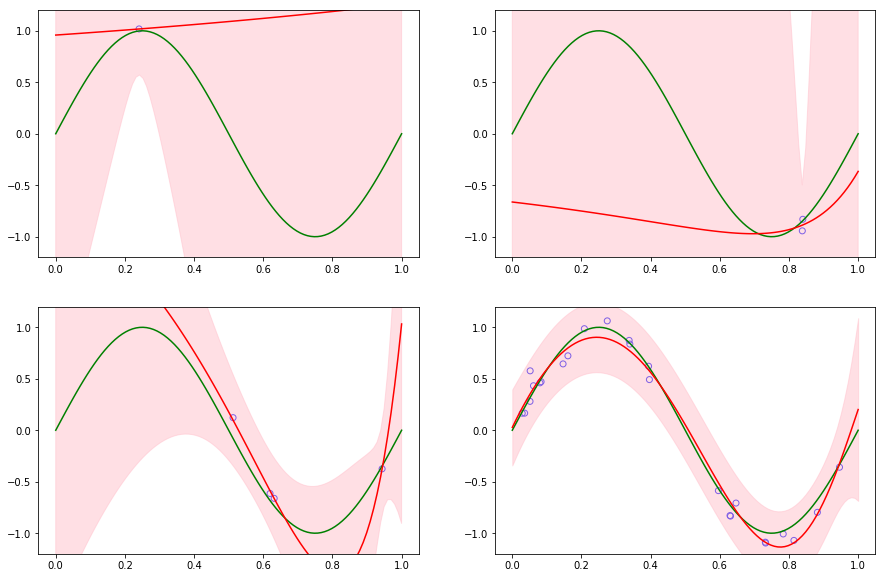

In [29]:
N = np.array([1, 2, 4, 25])
plt.figure(figsize=[15, 10])
M = 10
alpha = 5e-3
beta = 10
for i in range(N.shape[0]):
    train_x = np.random.uniform(0, 1, N[i]).reshape(-1, 1)
    train_y = np.sin(2*np.pi*train_x) + np.random.normal(loc=0, scale=0.1, size=N[i]).reshape(-1, 1)
    train_X = polynomial(train_x, M)
    test_X = polynomial(x.reshape(-1, 1), M)
    inv_S = alpha*np.eye(M) + beta*train_X.T@train_X
    mx = beta*test_X@np.linalg.inv(inv_S)@train_X.T@train_y
    s2 = 1/beta + np.diag(test_X @ np.linalg.inv(inv_S) @ test_X.T)
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(train_x, train_y, color='', edgecolors='blue')
    plt.plot(x, t, color='green')
    plt.plot(x, mx, color='red')
    plt.fill_between(x.flatten(), mx.flatten() - np.sqrt(s2.flatten()), mx.flatten() + np.sqrt(s2.flatten()), alpha = .5, color='pink')
    plt.ylim(-1.2, 1.2)

# 3.5 The Evidence Approximation

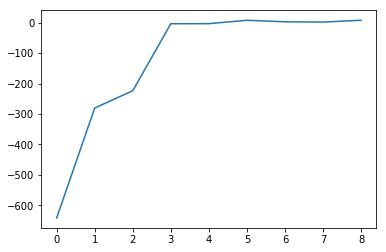

In [30]:
M = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
N = 30
alpha = 5e-3
beta = 1/.1**2
evidence = np.zeros([M.shape[0], 1])

for i in range(M.shape[0]):
    train_x = np.random.uniform(0, 1, N).reshape(-1, 1)
    train_y = np.sin(2*np.pi*train_x) + np.random.normal(loc=0, scale=.1, size=N).reshape(-1, 1)
    train_X = polynomial(train_x, M[i])
    test_X = polynomial(x.reshape(-1, 1), M[i])
    
    inv_S = alpha*np.eye(M[i]) + beta*train_X.T@train_X
    mx = beta*np.linalg.inv(inv_S)@train_X.T@train_y
    evidence[i] = .5*(M[i])*np.log(alpha) + .5*N*np.log(beta) \
    - .5*beta*np.linalg.norm(train_y-train_X@mx)**2 - .5*alpha*mx.T@mx \
    - .5*np.log(np.linalg.det(inv_S)) - .5*N*np.log(2*np.pi)
    
plt.figure()
plt.plot(evidence)

In [22]:
(z[:,1]-mu_prior).reshape(-1,2).shape

(1, 2)